C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


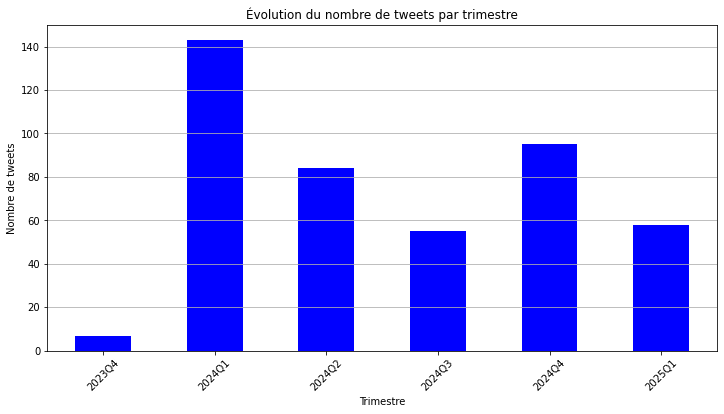

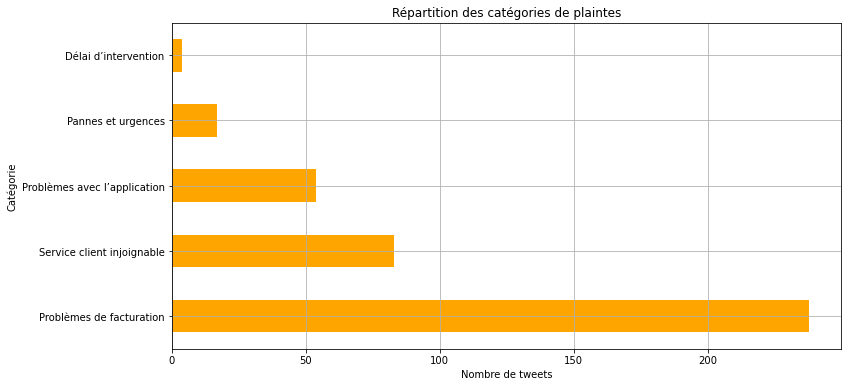

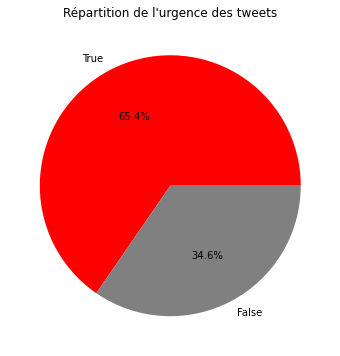

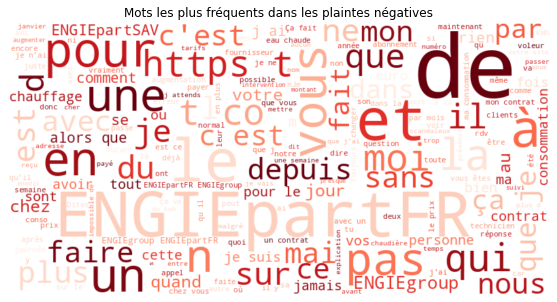

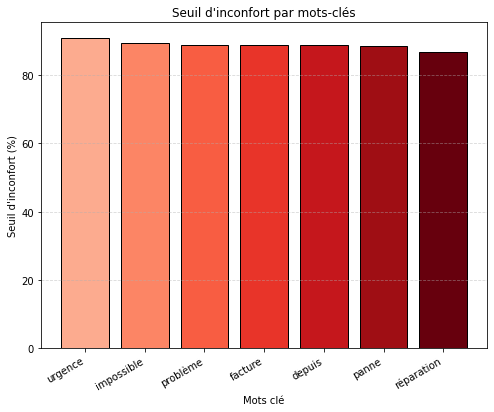

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# 🟢 Charger les données
df = pd.read_csv("tweets_enrichi.csv")

# 🟢 Convertir la colonne de date et extraire des données utiles
df["created_at"] = pd.to_datetime(df["created_at"])
df["heure"] = df["created_at"].dt.hour
df["année"] = df["created_at"].dt.year
df["trimestre"] = df["created_at"].dt.to_period('Q')

# ========================================================
# 1️⃣ 📊 ÉVOLUTION DES TWEETS PAR ANNÉE/TRIMESTRE
# ========================================================
plt.figure(figsize=(12,6))
df.groupby('trimestre').size().plot(kind='bar', color='blue')
plt.title("Évolution du nombre de tweets par trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig("evolution_tweets.png", bbox_inches='tight', dpi=300)
plt.show()

# ========================================================
# 2️⃣ 📑 RÉPARTITION DES CATÉGORIES DE PLAINTES
# ========================================================
plt.figure(figsize=(12,6))
df['Catégorie'].value_counts().plot(kind='barh', color='orange')
plt.title("Répartition des catégories de plaintes")
plt.xlabel("Nombre de tweets")
plt.ylabel("Catégorie")
plt.grid()
plt.savefig("repartition_categories.png", bbox_inches='tight', dpi=300)
plt.show()

# ========================================================
# 3️⃣ ⏳ ANALYSE DE L'URGENCE
# ========================================================
plt.figure(figsize=(8,6))
df['Urgence'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'gray', 'green'])
plt.title("Répartition de l'urgence des tweets")
plt.ylabel('')
plt.savefig("repartition_urgence.png", bbox_inches='tight', dpi=300)
plt.show()

# ========================================================
# 4️⃣ 🔍 NUAGES DE MOTS DES PLAINTES NÉGATIVES (sans mots inutiles)
# ========================================================
stopwords_fr = set(STOPWORDS) | {"bonjour", "merci", "engie", "gaz", "électricité", "facture", 
                                 "compteur", "client", "service", "problème", "compte", "tarif",
                                 "paiement", "mail", "énergie", "demande", "factures"}

negative_tweets = " ".join(df[df['Sentiment'] == "Négatif"]['full_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds', 
                      stopwords=stopwords_fr).generate(negative_tweets)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Mots les plus fréquents dans les plaintes négatives")
plt.savefig("nuage_mots_negatifs.png", bbox_inches='tight', dpi=300)
plt.show()

# ========================================================
# 5️⃣ ⚠️ SCORE D'INCONFORT PAR MOTS-CLÉS
# ========================================================
mots_cles = ["panne", "depuis", "urgence", "problème", "réparation", "facture", "retard", "impossible"]
frequence_mots = {mot: df[df['full_text'].str.contains(mot, case=False, na=False)]["Inconfort"].mean() 
                  for mot in mots_cles if not df[df['full_text'].str.contains(mot, case=False, na=False)].empty}

df_mots_inconfort = pd.DataFrame(list(frequence_mots.items()), columns=["Mot clé", "Seuil d'inconfort"])
df_mots_inconfort = df_mots_inconfort.sort_values(by="Seuil d'inconfort", ascending=False)

plt.figure(figsize=(8,6))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(df_mots_inconfort)))
plt.bar(df_mots_inconfort["Mot clé"], df_mots_inconfort["Seuil d'inconfort"], color=colors, edgecolor="black")
plt.xlabel("Mots clé")
plt.ylabel("Seuil d'inconfort (%)")
plt.title("Seuil d'inconfort par mots-clés")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("score_inconfort_mots.png", bbox_inches='tight', dpi=300)
plt.show()

In [2]:
!pip install --upgrade pillow wordcloud
